In [1]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

In [2]:
def sample(sigma, n):
    return np.random.normal(scale=np.sqrt(sigma), size=n)

In [3]:
def interval_by_chi(X, gamma=0.95):
    left = scipy.stats.chi2(X.shape[0]).ppf((1+gamma)/2)
    right = scipy.stats.chi2(X.shape[0]).ppf((1-gamma)/2)
    x2_sum = np.sum(np.power(X,2))
    return x2_sum/left, x2_sum/right

In [4]:
def interval_by_norm(X, gamma=0.95):
    left = scipy.stats.norm(loc=0, scale=1).ppf((3+gamma)/4)**2
    right = scipy.stats.norm(loc=0, scale=1).ppf((3-gamma)/4)**2
    n_sqr_mean_x = X.shape[0]*np.power(np.mean(X),2)
    return n_sqr_mean_x/left, n_sqr_mean_x/right

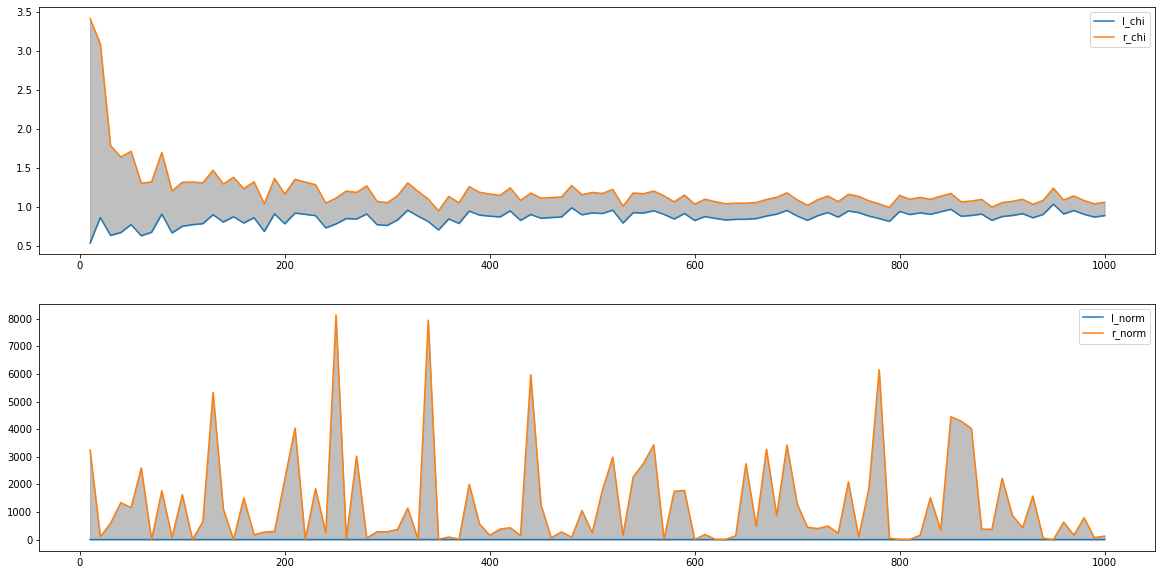

In [5]:
sigma=1

left_chi, right_chi = [], []
left_norm, right_norm = [], []
n_space = np.linspace(10, 1e3, 100, dtype=int)
for n in n_space:
    X = sample(sigma, n)
    
    l, r = interval_by_chi(X)
    left_chi.append(l)
    right_chi.append(r)
    
    l, r = interval_by_norm(X)
    left_norm.append(l)
    right_norm.append(r)
    
    
fig, axs = plt.subplots(2, 1, figsize=(20,10))
axs[0].plot(n_space, left_chi, label='l_chi')
axs[0].plot(n_space, right_chi, label='r_chi')
axs[0].fill_between(n_space, left_chi, right_chi, color='grey', alpha=0.5)
axs[0].legend();

axs[1].plot(n_space, left_norm, label='l_norm')
axs[1].plot(n_space, right_norm, label='r_norm')
axs[1].fill_between(n_space, left_norm, right_norm, color='grey', alpha=0.5)
axs[1].legend();


In [6]:
n_space = np.linspace(10, 1e7, 10, dtype=int)
res = []
for n in n_space:
    X = sample(sigma, n)
    
    l, r = interval_by_chi(X)
    res.append((r-l, l, r, n))
__import__('pandas').DataFrame(sorted(res), columns=['width', 'l', 'r', 'n']).set_index('width')

,l,r,n
width,,,
0.001753,0.999117,1.000870,10000000
0.001859,0.999072,1.000932,8888890
0.001989,0.999379,1.001367,7777780
0.002147,0.998806,1.000953,6666670
0.002351,0.998630,1.000981,5555560
0.002629,0.998374,1.001003,4444450
0.003034,0.997840,1.000875,3333340
0.003720,0.998350,1.002069,2222230
0.005261,0.997779,1.003040,1111120


In [7]:
n_space = np.linspace(10, 1e7, 10, dtype=int)
res = []
for n in n_space:
    X = sample(sigma, n)
    
    l, r = interval_by_norm(X)
    res.append((r-l, l, r, n))
__import__('pandas').DataFrame(sorted(res), columns=['width', 'l', 'r', 'n']).set_index('width')

,l,r,n
width,,,
22.618078,0.004422,22.622500,5555560
72.493939,0.014174,72.508113,4444450
299.257901,0.058510,299.316412,10000000
401.256576,0.078453,401.335029,6666670
493.697900,0.096527,493.794427,8888890
1136.126421,0.222133,1136.348554,10
1335.989448,0.261210,1336.250659,3333340
3258.374814,0.637072,3259.011886,7777780
3888.679467,0.760308,3889.439775,1111120


## Вывод
Заметим, что первый способ построения доверительного интервала можно назвать хорошим, так как он действтительно оценивает наш параметр и постепенно уменьшает свою ширину. Без аналиитики, очевидно, невозможно определить есть ли у этого уменьшения предел, но у меня к сожалению не получилось это выяснить.
Второй способ бесполезен, так как его ширина постоянно изменяется, при чем в значительных диапазонах, для очень широкого набора размеров выборок. 